In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from sklearn.linear_model import LinearRegression
import itertools
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
from functions.table import *
from functions.linear_regression import *

In [3]:
ds_with_artifical_temperature = '../datasets/model_output/artifical_data/finer_300s_3x3x3.csv'

ds_with_real_temperature_train = '../datasets/model_output/real_data/aug2020/04-08_fine_3x3x3.csv'
ds_with_real_temperature_test = '../datasets/model_output/real_data/aug2020/09-11_fine_3x3x3.csv'

input_filename_train = ds_with_real_temperature_train
input_filename_test = ds_with_real_temperature_test
max_shift = 60

In [4]:
df_train = pd.read_csv(input_filename_train, sep=',', skiprows=4)
df_test = pd.read_csv(input_filename_test, sep=',', skiprows=4)
df_train

,% Time (s),"Temperature (degC), Point: (2.35, 7.65, 0.15)","Temperature (degC), Point: (5.15, 7.65, 0.15)","Temperature (degC), Point: (7.95, 7.65, 0.15)","Temperature (degC), Point: (2.35, 3, 0.15)","Temperature (degC), Point: (5.15, 3, 0.15)","Temperature (degC), Point: (7.95, 3, 0.15)","Temperature (degC), Point: (2.35, -1.65, 0.15)","Temperature (degC), Point: (5.15, -1.65, 0.15)","Temperature (degC), Point: (7.95, -1.65, 0.15)",...,"Temperature (degC), Point: (2.35, 7.65, 2.85)","Temperature (degC), Point: (5.15, 7.65, 2.85)","Temperature (degC), Point: (7.95, 7.65, 2.85)","Temperature (degC), Point: (2.35, 3, 2.85)","Temperature (degC), Point: (5.15, 3, 2.85)","Temperature (degC), Point: (7.95, 3, 2.85)","Temperature (degC), Point: (2.35, -1.65, 2.85)","Temperature (degC), Point: (5.15, -1.65, 2.85)","Temperature (degC), Point: (7.95, -1.65, 2.85)",T_outer (degC)
0,0,20.000018,20.000040,19.999788,20.000017,20.000062,19.999773,20.000142,20.000045,19.999772,...,20.000120,20.000044,19.999764,19.999925,20.000040,19.999770,20.000170,19.999990,19.999799,17.9
1,300,20.022770,20.019233,19.921620,20.015763,20.025030,19.914699,20.052881,20.029065,19.916052,...,20.046141,20.030609,19.914478,20.018012,20.025389,19.914142,20.060678,20.013389,19.924698,17.9
2,600,20.048895,20.037153,19.852413,20.032727,20.047097,19.838618,20.098991,20.056973,19.842365,...,20.087265,20.059979,19.840100,20.043108,20.049255,19.837905,20.112217,20.030607,19.857613,17.9
3,900,20.075358,20.054335,19.787781,20.049700,20.067165,19.767165,20.141280,20.083815,19.773829,...,20.125391,20.088070,19.771255,20.069671,20.071877,19.766494,20.158683,20.049488,19.794622,17.9
4,1200,20.101351,20.070620,19.728363,20.066304,20.084634,19.701004,20.178946,20.109134,19.711181,...,20.159795,20.114289,19.708687,20.096604,20.092779,19.700600,20.199064,20.070089,19.736295,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,344400,27.148585,27.414390,23.283341,28.798414,25.000554,22.633286,25.982862,25.176022,22.885868,...,29.817321,30.210441,23.984160,28.164004,28.879589,23.475406,28.176025,27.634327,23.684219,20.0
1149,344700,27.110742,27.377559,23.262635,28.734265,24.985163,22.612821,25.946321,25.147712,22.861784,...,29.756522,30.145227,23.959455,28.107435,28.826062,23.449499,28.118585,27.582338,23.654560,19.9
1150,345000,27.072900,27.340729,23.241930,28.670117,24.969771,22.592355,25.909779,25.119402,22.837700,...,29.695723,30.080013,23.934749,28.050866,28.772536,23.423592,28.061146,27.530348,23.624901,19.9
1151,345300,27.035058,27.303898,23.221225,28.605968,24.954379,22.571889,25.873238,25.091092,22.813616,...,29.634925,30.014799,23.910043,27.994297,28.719009,23.397684,28.003706,27.478359,23.595242,19.8


In [5]:
result = calc_all_points(df_train, df_test, max_shift)
print_results(df_test, result[-1], max_shift)

Лучшая точка: Point: (2.35, 3, 1.5), отсуп времени: 155 минут
Коэффициент детерминации (R^2): 0.6834257333339867 

        Время  Предсказание  Реальность
0         0.0     16.653640        19.3
1       300.0     16.621629        19.2
2       600.0     16.589617        19.3
3       900.0     16.557606        19.1
4      1200.0     16.525595        19.3
..        ...           ...         ...
800  240000.0     17.246254        18.1
801  240300.0     17.204480        17.8
802  240600.0     17.162705        17.9
803  240900.0     17.120930        17.8
804  241200.0     17.079156        17.7

[805 rows x 3 columns]


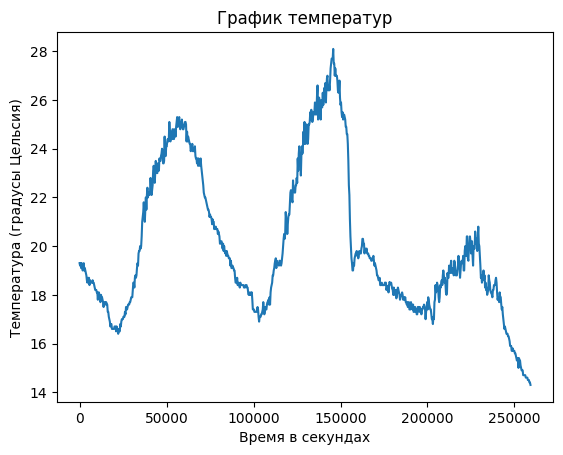

In [6]:
plt.plot(time_column(df_test), outer_temperature(df_test))
plt.xlabel('Время в секундах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()

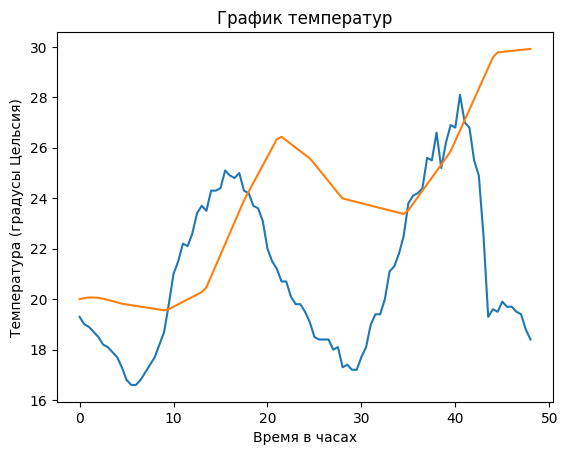

In [7]:
day = 12 * 24
# 11, 13
time = time_column(df_test, 0, -day)[::6] / 3600
ambient = outer_temperature(df_test, 0, -day)[::6]
point = point_temperature_2d(df_test, 11, 0, -day)[::6]

plt.plot(time, ambient)
plt.plot(time, point)

plt.xlabel('Время в часах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()

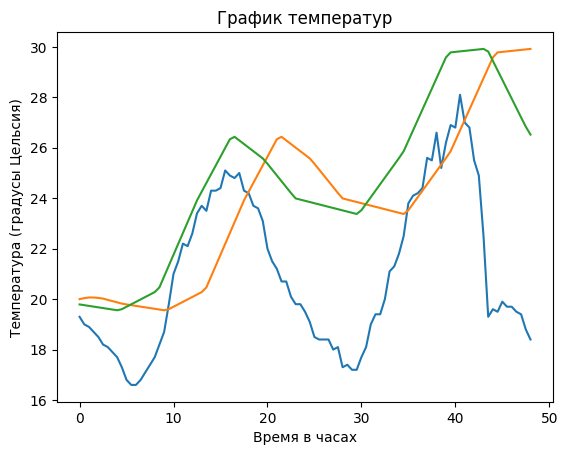

In [8]:
day = 12 * 24
# 11, 13
shift = find_best_shift(df_test, 11, max_shift)

time = time_column(df_test, 0, -day)[::6] / 3600
ambient = outer_temperature(df_test, 0, -day)[::6]
point = point_temperature_2d(df_test, 11, 0, -day)[::6]
point_shifted = point_temperature_2d(df_test, 11, shift, shift-day)[::6]

plt.plot(time, ambient)
plt.plot(time, point)
plt.plot(time, point_shifted)

plt.xlabel('Время в часах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()

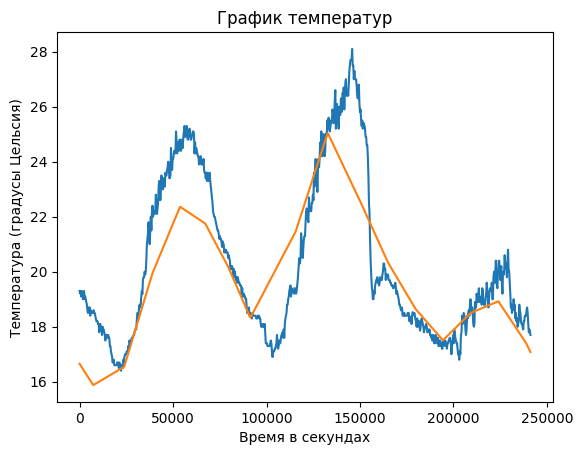

In [9]:
real = outer_temperature(df_test, 0, -max_shift)
time = time_column(df_test, 0, -max_shift)
predict = result[-1].predict

plt.plot(time, real)
plt.plot(time, predict)
plt.xlabel('Время в секундах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()

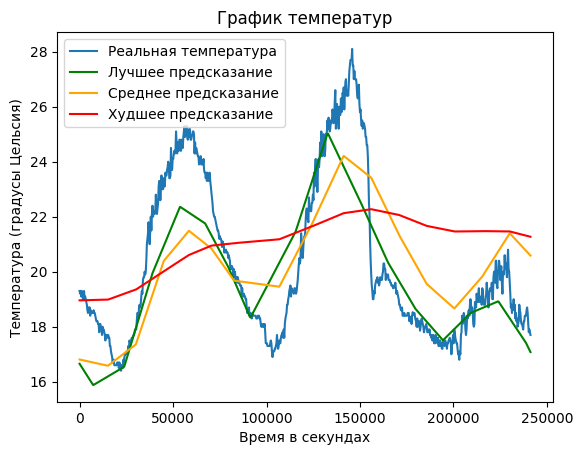

In [27]:
real = outer_temperature(df_test, 0, -max_shift)
time = time_column(df_test, 0, -max_shift)

predict_best = result[-1].predict
predict_mid = result[len(result) // 2].predict
predict_worst2 = result[1].predict
predict_worst = result[0].predict

plt.plot(time, real, label='Реальная температура')
plt.plot(time, predict_best, label='Лучшее предсказание', color='green')
plt.plot(time, predict_mid, label='Среднее предсказание', color='orange')
# plt.plot(time, predict_worst2, label='Плохое предсказание', color='orange')
plt.plot(time, predict_worst, label='Худшее предсказание', color='red')
plt.xlabel('Время в секундах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.legend()
plt.show()

In [17]:
print(f'best {point_coordinates(df_test, result[-3].point)}')
print(f'mid {point_coordinates(df_test, result[len(result) // 2].point)}')
print(f'worst {point_coordinates(df_test, result[4].point)}')

best Point: (2.35, -1.65, 2.85)
mid Point: (5.15, 7.65, 0.15)
worst Point: (5.15, -1.65, 1.5)
